In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('adult.data.csv', header=None)

In [73]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [74]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
# 哪些工作類型更容易賺到高薪？哪些工作類型更容易賺到低薪？

In [76]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [77]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [78]:
inx = data[data['income'] == ' >50K']['workclass'].value_counts().sort_values(ascending=False).index.tolist()
inx

[' Private',
 ' Self-emp-not-inc',
 ' Self-emp-inc',
 ' Local-gov',
 ' Federal-gov',
 ' State-gov',
 ' ?']

<Axes: xlabel='workclass', ylabel='count'>

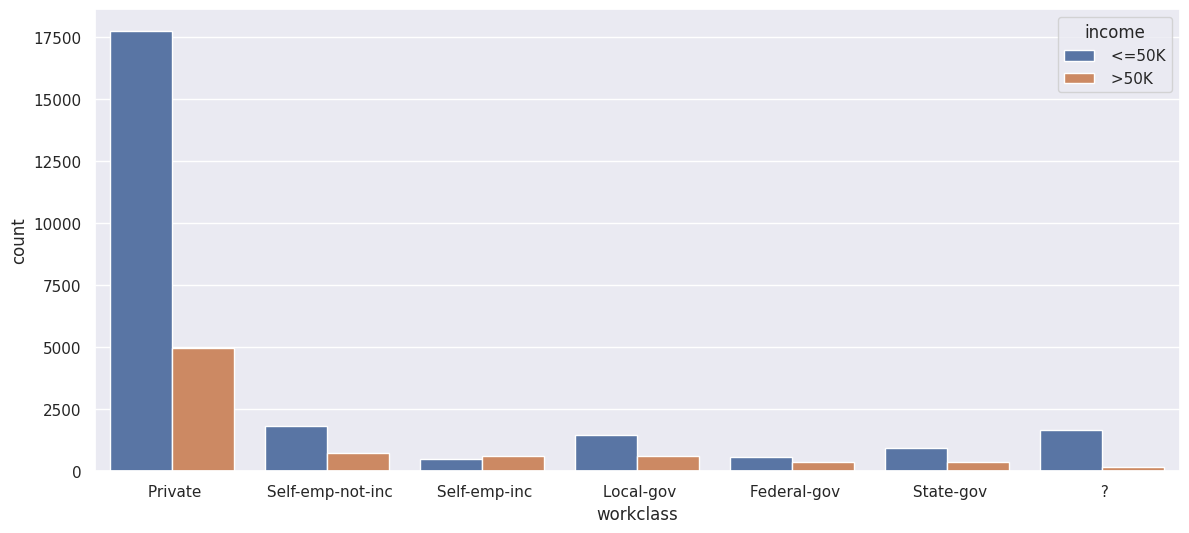

In [79]:
sns.set(rc={'figure.figsize': (14, 6)})
sns.countplot(x='workclass', hue='income', data=data, order=inx)

# occupation_income = pd.DataFrame(data.groupby('workclass')['income'].value_counts())
# occupation_income.plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Prof-specialty'),
  Text(2, 0, ' Sales'),
  Text(3, 0, ' Craft-repair'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Transport-moving'),
  Text(6, 0, ' Tech-support'),
  Text(7, 0, ' Machine-op-inspct'),
  Text(8, 0, ' Protective-serv'),
  Text(9, 0, ' ?'),
  Text(10, 0, ' Other-service'),
  Text(11, 0, ' Farming-fishing'),
  Text(12, 0, ' Handlers-cleaners'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

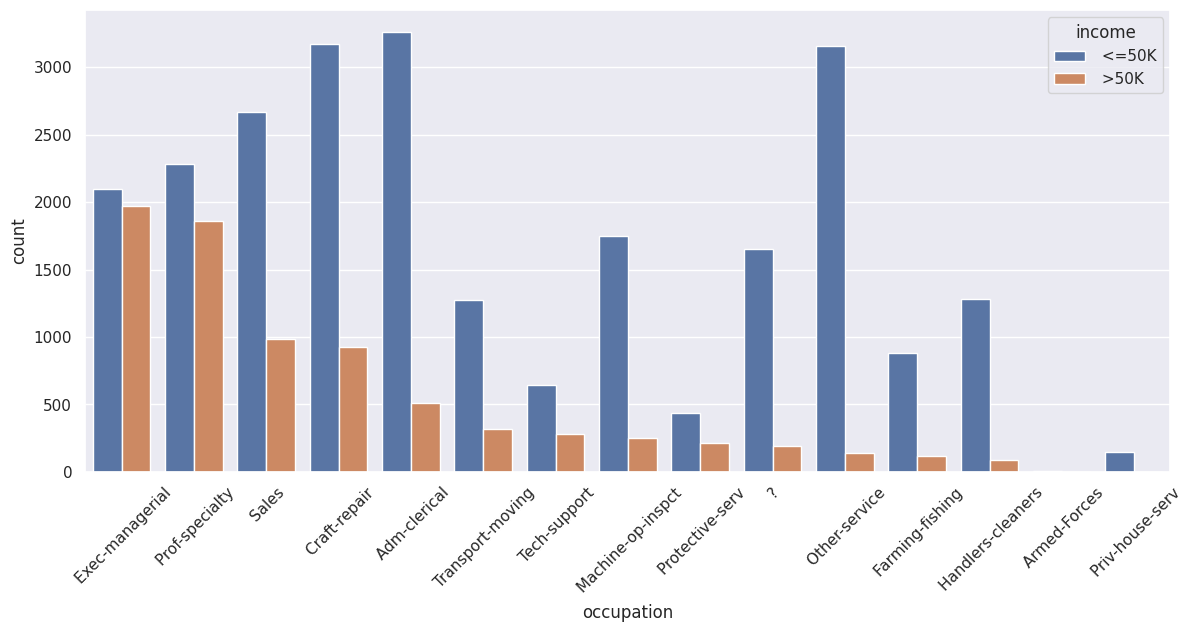

In [80]:
inx = data[data['income'] == ' >50K']['occupation'].value_counts().sort_values(ascending=False).index.tolist()
ax = sns.countplot(x='occupation', hue='income', data=data, order=inx)
plt.xticks(rotation=45) 

<Axes: xlabel='income', ylabel='hours_per_week'>

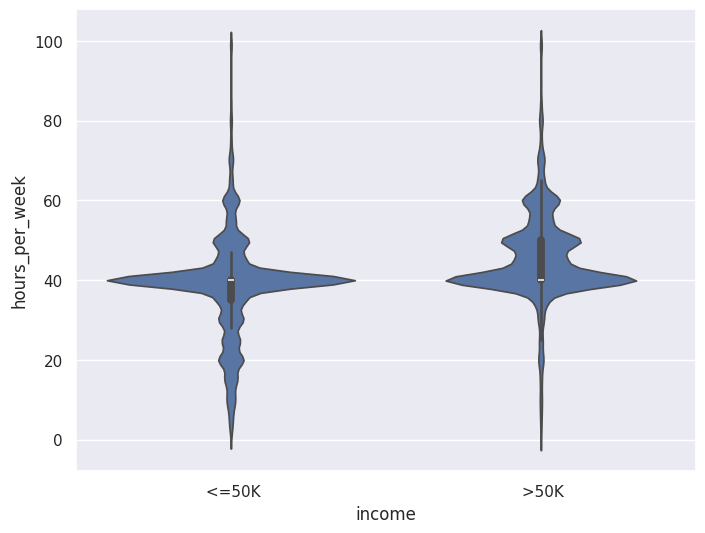

In [81]:
# 工作時間是否影響收入？
sns.set(rc={'figure.figsize': (8, 6)})
sns.violinplot(data=data, x="income", y="hours_per_week")

In [82]:
# see the most significant workclass when income>50K and work hours > 40hr
data[(data['income'] == ' >50K') & (data['hours_per_week'] > 40)]['workclass'].value_counts().sort_values(ascending=False)

workclass
 Private             2483
 Self-emp-inc         422
 Self-emp-not-inc     420
 Local-gov            232
 State-gov            139
 Federal-gov          109
 ?                     51
Name: count, dtype: int64